
# Виджеты

Установка:

`sudo pip install ipywidgets`

Активация в Jupyter Notebook:

`jupyter nbextension enable --py widgetsnbextension`

Активация в Jupyter Lab:

`jupyter labextension install @jupyter-widgets/jupyterlab-manager`

Возможно, потребуется также установить некоторые пакеты:

`sudo apt-get install nodejs npm`

In [1]:
import ipywidgets as widgets

### Простые примеры

Определяем простую функцию, передаем ее и принцип изменения аргументов в `widgets.interact` и получаем виджет, позволяющий проследить изменения значений функции при изменении аргументов средствами виджета.

In [2]:
def f(x):
    return x

In [3]:
widgets.interact(f, x=10);

In [4]:
widgets.interact(f, x=True);

In [5]:
widgets.interact(f, x='text');

'text'

Можно использовать в виде декораторов

In [6]:
@widgets.interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

Простая функция двух аргументов

In [7]:
def h(p, q):
    return (p, q)

Виджет не обязательно должен иметь возможность менять все параметры функций. Некоторые можно зафиксировать с помощью `widgets.fixed`.

In [8]:
widgets.interact(h, p=5, q=widgets.fixed(20));

interactive(children=(IntSlider(value=5, description='p', max=15, min=-5), Output()), _dom_classes=('widget-in…

Диаппазон изменения значений переменной, шаг и начальное значение можно указывать самостоятельно с помощью `widgets.IntSlider`.

In [9]:
widgets.IntSlider(min=-10, max=30, step=1, value=10)

IntSlider(value=10, max=30, min=-10)

In [10]:
widgets.interact(f, x=widgets.IntSlider(min=-30, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='x', max=30, min=-30), Output()), _dom_classes=('widget-…

Или передав тупл значений подобно функции `range`.

In [11]:
widgets.interact(f, x=(0, 8, 2));

interactive(children=(IntSlider(value=4, description='x', max=8, step=2), Output()), _dom_classes=('widget-int…

Если передать дробные числа, то будет использован `widgets.FloatSlider`

In [12]:
widgets.interact(f, x=(0.0, 10.0, 0.01));

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.01), Output()), _dom_classes=('…

Можно так же передавать словарь, ключи которого будут отображаться на виджете, а значения -- передаваться в функцию в кажестве аргумента

In [13]:
widgets.interact(f, x={'one': 10, 'two': 20});

interactive(children=(Dropdown(description='x', options={'one': 10, 'two': 20}, value=10), Output()), _dom_cla…

Напишем функцию, которая медленно работает

In [14]:
from time import sleep

In [15]:
def slow_function(x):
    sleep(1)
    return x**2

In [16]:
slow_function(2)

4

Каждый раз значение вычисляется заново, поэтому для медленных функций появляются задержки обновления значений

In [17]:
widgets.interact(slow_function, 
                 x=widgets.FloatSlider(min=0, max=10, step=0.5, value=1));

interactive(children=(FloatSlider(value=1.0, description='x', max=10.0, step=0.5), Output()), _dom_classes=('w…

В таком случае с помощью `widgets.interact_manual` можно сначала настроить значение аргумента, а затем запустить расчет

In [18]:
widgets.interact_manual(slow_function, 
                        x=widgets.FloatSlider(min=0, max=10, step=0.5, value=1));

interactive(children=(FloatSlider(value=1.0, description='x', max=10.0, step=0.5), Button(description='Run Int…

## Виджеты и графики

In [19]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

### График плотности

Функция, которая рисует график плотности

In [20]:
def show_pdf(pdf, xmin, xmax, ymax, grid_size=100, **kwargs):
    grid = np.linspace(xmin, xmax, grid_size)
    
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=3)
    plt.grid(ls=':')
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    plt.show()

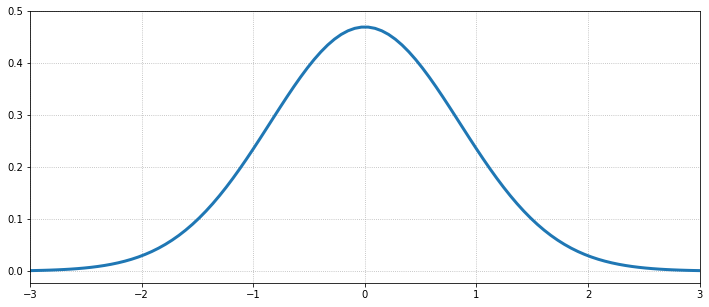

In [21]:
show_pdf(sps.norm.pdf, -3, 3, 0.5, scale=0.85)

Создаем виджет: передаем функцию, фиксируем семейство распределений и задает диаппазон изменения параметров

In [22]:
# создать виджет, но не отображать его
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sps.norm.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
    xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
    xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
    ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
    loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
    scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=1)
)

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

Output()

### Параметры картинок

Посчитаем характеристики некоторых изображений

In [23]:
import os


means_r, means_g, means_b = [], [], []
dir_name = './cats/'
picture_names = os.listdir(dir_name)

for file_name in picture_names:
    image = plt.imread(dir_name + file_name)
    r, g, b = image.mean(axis=(0, 1))[:3]
    means_r.append(r), means_g.append(g), means_b.append(b)

Создаем виджет, в котором можно выбрать интересную картинку и показать ее

In [24]:
annotation = [picture_names[i] + \
              ': r={:.2f}, g={:.2f}, b={:.2f}'.format(means_r[i], means_g[i], means_b[i]) 
              for i in range(len(picture_names))]

widgets.interact(lambda pic_name: None if (plt.figure(figsize=(12, 8)), 
                                           plt.imshow(plt.imread(dir_name + pic_name))) else None,
                 pic_name=dict(zip(annotation, picture_names)));

interactive(children=(Dropdown(description='pic_name', options={'4.jpg: r=106.43, g=90.67, b=61.51': '4.jpg', …

## Можно сделать пользовательский интерфейс!

In [25]:
import pandas as pd
import seaborn as sns

Сгенерируем таблицу случайных чисел и запишем в файл

In [26]:
pd.DataFrame(sps.uniform.rvs(size=(100000, 7))).to_csv('example.csv', index=False)

In [27]:
def read_file(path, nrows):
    ''' Читает из файла по адресу path первые nrows 
    и предоставляет дополительную функциональность.
    '''
    
    # Чтение файла
    df = pd.read_csv(path, nrows=nrows)
    
    # Сообщение о результате чтения
    status = widgets.Label(value='Готово! Первые несколько строк:')
    display(status)
    display(df.head(5))
    
    # Кнопка вычисления описательных статистик
    w_describe = widgets.Button(description='Описательные статистики', layout=widgets.Layout(width='150px'))
    # Установка действия по нажатию кнопки
    def on_click_describe(_):
        display(df.describe())
    w_describe.on_click(on_click_describe)
    
    # Кнопка для отрисовки ящиков с усами
    w_boxplot = widgets.Button(description='Box plot', layout=widgets.Layout(width='150px'))
    # Установка действия по нажатию кнопки
    def on_click_boxplot(_):
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df)
        plt.show()
    w_boxplot.on_click(on_click_boxplot)
    
    # Отображение кнопок
    display(widgets.HBox([w_describe, w_boxplot]))

    
def create_widgets():
    ''' Создает интерфейс чтения файла '''
    
    # Поле ввода пути файла
    w_path = widgets.Text(value='', layout=widgets.Layout(width='500px'))
    # Поле ввода количества строк
    w_nrows = widgets.IntText(value=5, layout=widgets.Layout(width='80px'))
    
    # Кнопка запуска чтения файла
    w_click = widgets.Button(description='Прочитать', layout=widgets.Layout(width='150px'))
    # Установка действия по нажатию кнопки
    def on_click(_):
        read_file(w_path.value, w_nrows.value)
    w_click.on_click(on_click)
    
    # Оторажение двух виджетов в строку: поле ввода и пояснение
    display(widgets.HBox([
        widgets.Label('Введите путь к данным: '),
        w_path
    ]))
    # Оторажение двух виджетов в строку: поле ввода и пояснение
    display(widgets.HBox([
        widgets.Label('Сколько прочитать строк: '),
        w_nrows
    ]))
    # Оторажение кнопки
    display(w_click)

In [28]:
create_widgets()

Button(description='Прочитать', layout=Layout(width='150px'), style=ButtonStyle())

## Библиотека `tqdm`

In [29]:
from tqdm import tqdm, tqdm_notebook

Обычная версия

In [30]:
for i in tqdm(range(10**7)):
    pass

100%|██████████| 10000000/10000000 [00:01<00:00, 5636646.24it/s]


Версия для ноутбуков

In [31]:
for i in tqdm_notebook(range(10**7)):
    pass

## Свой аналог `tqdm`, печатающий доп. информацию

In [32]:
from IPython.display import display

Задача решается объектом progress bar

In [33]:
progress = widgets.IntProgress(min=0, max=10, value=0)
display(progress)

IntProgress(value=0, max=10)

Изменение значение приводит к изменению самого progress bar, даже если он был в другой ячейке

In [34]:
progress.value = 7

Телепортация в прошлое

In [35]:
progress.value = 3

Использование в циклах с выводом некоторой дополнительной информации, что очень не просто сделать с помощью tqdm

In [36]:
progress = widgets.IntProgress(min=0, max=10**2, value=0)
display(progress)

try:
    for i in range(10**2):
        progress.value = i
        progress.description = '{}, {}'.format(i, i**2)
        sleep(.1)
except:
    progress.bar_style = 'danger'
    raise
else:
    progress.value = 10**2
    progress.bar_style = 'success'

IntProgress(value=0)

Полная документация http://ipywidgets.readthedocs.io/en/latest/index.html

-----

Статистика, прикладной поток 2019

https://mipt-stats.gitlab.io/